<a href="https://colab.research.google.com/github/Rohan1-tech/AutoPrice-ML-Predicting-Car-Values-Using-Machine-Learning/blob/main/AutoPrice_ML_Predicting_Car_Values_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**  - **AutoPrice ML: Predicting Car Values Using Machine Learning**



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.


The used car market has grown rapidly in recent years, with millions of customers preferring pre-owned vehicles due to affordability, value retention, and wide availability. As a result, accurately estimating a car’s fair market price has become a significant challenge for both buyers and sellers. Incorrect pricing can lead to financial losses, poor negotiation outcomes, or extended listing periods. This project, **AutoPrice ML**, aims to build a reliable and intelligent machine learning system that predicts the price of used cars based on their key attributes. The solution is developed using real-world data obtained from Quikr, a popular online marketplace for used vehicles.

The project involves cleaning and preparing the dataset, which contains details such as car name, year, kilometers driven, fuel type, and selling price. We explore the data to understand trends, identify important features, and check how factors like age and mileage affect car value. Feature engineering is performed to extract meaningful information, such as car age and brand.

Machine learning models like Linear Regression and Random Forest are then trained and evaluated to find the best-performing model for price prediction. Overall, **AutoPrice ML** provides a simple, practical, and data-driven approach to estimating used car prices with better accuracy.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**



The price of a used car depends on multiple factors such as its brand, manufacturing year, mileage, fuel type, and overall condition. Buyers often struggle to estimate the fair value of a vehicle, while sellers risk underpricing or overpricing their listings. This leads to confusion, financial loss, and inefficient negotiations.
The goal of this project, **AutoPrice ML**, is to build a machine learning model that can accurately predict the selling price of a used car based on its key features. Using real-world data collected from Quikr, the model will analyze important attributes and generate a reliable price estimate.
This system will help buyers make informed purchasing decisions and assist sellers in setting competitive and justified prices.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [78]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset

from google.colab import files
uploaded = files.upload()

Saving quikr_car.csv to quikr_car.csv


### Dataset First View

In [3]:
# Dataset First Look


df = pd.read_csv("quikr_car.csv")

df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

rows, cols = df.shape
print("Total Rows:", rows)
print("Total Columns:", cols)



Total Rows: 892
Total Columns: 6


### Dataset Information

In [5]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count

print(df.duplicated().sum())


94


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count

df.isnull().sum()

,0
name,0
company,0
year,0
Price,0
kms_driven,52
fuel_type,55


<Axes: >

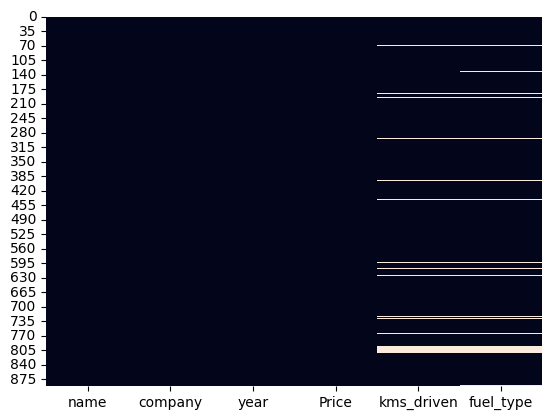

In [9]:
# Visualizing the missing values

sns.heatmap(df.isnull(), cbar=False)



# **Data Issues Identified**

During the initial exploration of the dataset, several inconsistencies and formatting issues were identified:



 **1. Year Column Issues**

* Contains non-year values and random text.
* Mixed formats and inconsistent data types.
* Includes garbage text instead of proper manufacturing years.
* Requires extraction of only valid 4-digit years.



**2. Company Column Issues**

* Inconsistent capitalization (e.g., Tata, tata, TATA).
* Contains unrelated words not associated with car brands.
* Includes incomplete or incorrect brand names.
* Needs normalization and filtering of valid car manufacturers.


 **3. Name Column Issues**

* Contains full sentences or marketing text instead of model names.
* Includes truncated, incomplete, or messy names.
* Contains unnecessary keywords like “used”, “sale”, etc.
* Requires extraction of proper **brand + model** information.


**4. Kms_Driven Column Issues**

* Contains commas in numeric values.
* Includes text like “kms” or “Km” inside the values.
* Contains completely incorrect entries such as “Petrol”.
* Has unrealistic or invalid values like “0 kms” or “00 kms”.
* Requires extraction of digits and conversion to integer.


 **5. General Dataset Issues**

* Unstructured scraped data with significant noise.
* Inconsistent formatting across multiple columns.
* Numeric and text values mixed together.
* Requires extensive text cleaning, regex extraction, normalization, and type conversions.




### What did you know about your dataset?

Answer Here

The dataset contains used car listings collected from Quikr, an online marketplace. It includes important information about each vehicle such as its name, company (brand), manufacturing year, kilometers driven, fuel type, and selling price. The dataset is relatively small but represents real-world, unstructured marketplace data, which means several columns contain messy text, inconsistent formatting, and mixed data types.
Overall, the dataset provides enough features to build a machine learning model for predicting used car prices, but it requires significant cleaning and preprocessing before modeling.


## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns

df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [11]:
# Dataset Describe

df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


### Variables Description

Answer Here  


**Variables Description**

| Variable Name  | Description                                                                                   |
| -------------- | --------------------------------------------------------------------------------------------- |
| **name**       | The full name of the car, usually including the brand and model (e.g., “Hyundai i20 Sportz”). |
| **company**    | The manufacturer or brand of the car (e.g., Maruti, Hyundai, Honda, Toyota).                  |
| **year**       | Manufacturing year of the car. Used to calculate the car’s age.                               |
| **Price**      | The selling price of the used car (this is the **target variable** we want to predict).       |
| **kms_driven** | The total distance the car has been driven in kilometers. Indicates usage and wear.           |
| **fuel_type**  | The type of fuel used by the car (e.g., Petrol, Diesel, CNG).                                 |




### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.

for col in df.columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())




Unique values in 'name':
['Hyundai Santro Xing XO eRLX Euro III' 'Mahindra Jeep CL550 MDI'
 'Maruti Suzuki Alto 800 Vxi' 'Hyundai Grand i10 Magna 1.2 Kappa VTVT'
 'Ford EcoSport Titanium 1.5L TDCi' 'Ford Figo' 'Hyundai Eon'
 'Ford EcoSport Ambiente 1.5L TDCi' 'Maruti Suzuki Alto K10 VXi AMT'
 'Skoda Fabia Classic 1.2 MPI' 'Maruti Suzuki Stingray VXi'
 'Hyundai Elite i20 Magna 1.2' 'Mahindra Scorpio SLE BS IV' 'Audi A8'
 'Audi Q7' 'Mahindra Scorpio S10' 'Maruti Suzuki Alto 800'
 'Hyundai i20 Sportz 1.2' 'Maruti Suzuki Alto 800 Lx'
 'Maruti Suzuki Vitara Brezza ZDi' 'Maruti Suzuki Alto LX'
 'Mahindra Bolero DI' 'Maruti Suzuki Swift Dzire ZDi'
 'Mahindra Scorpio S10 4WD' 'Maruti Suzuki Swift Vdi BSIII'
 'Maruti Suzuki Wagon R VXi BS III' 'Maruti Suzuki Wagon R VXi Minor'
 'Toyota Innova 2.0 G 8 STR BS IV' 'Renault Lodgy 85 PS RXL'
 'Skoda Yeti Ambition 2.0 TDI CR 4x2' 'Maruti Suzuki Baleno Delta 1.2'
 'Renault Duster 110 PS RxZ Diesel Plus' 'Renault Duster 85 PS RxE Diesel'
 'Honda City 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [74]:
# Step 1: Remove Duplicates

df = df.drop_duplicates()
df = df.reset_index(drop=True)



# Step 2: Clean 'year'
# Convert to string
df['year'] = df['year'].astype(str)

# Extract 4-digit year
df['year'] = df['year'].str.extract(r'(\d{4})')

# Convert to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Drop invalid years
df = df.dropna(subset=['year'])

# Convert to integer
df['year'] = df['year'].astype(int)


# Step 3: Clean the 'company' Column

# Convert to string
df['company'] = df['company'].astype(str)

# Normalize case
df['company'] = df['company'].str.title()

# Remove invalid names
df = df[df['company'].str.len() > 2]



# Step 4: Clean the 'name' Column

# Convert to string
df['name'] = df['name'].astype(str)

# Convert to Title Case
df['name'] = df['name'].str.title()

# Keep first two words (Brand + Model)
df['name'] = df['name'].str.split().str[:2].str.join(' ')




# Step 5: Clean the 'kms_driven' Column

# Convert to string
df['kms_driven'] = df['kms_driven'].astype(str)

# Remove commas
df['kms_driven'] = df['kms_driven'].str.replace(',', '', regex=False)

# Remove 'kms'
df['kms_driven'] = df['kms_driven'].str.replace('kms', '', case=False, regex=False)

# Remove 'km'
df['kms_driven'] = df['kms_driven'].str.replace('km', '', case=False, regex=False)

# Extract digits
df['kms_driven'] = df['kms_driven'].str.extract(r'(\d+)')

# Convert to numeric
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')

# Drop invalid rows
df = df.dropna(subset=['kms_driven'])

# Convert to integer
df['kms_driven'] = df['kms_driven'].astype(int)




# Step 6: Clean the 'Price' Column
# Convert to string
df['Price'] = df['Price'].astype(str)

# Remove commas
df['Price'] = df['Price'].str.replace(',', '', regex=False)

# Extract digits
df['Price'] = df['Price'].str.extract(r'(\d+)')

# Convert to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop invalid rows
df = df.dropna(subset=['Price'])

# Convert to integer
df['Price'] = df['Price'].astype(int)

### What all manipulations have you done and insights you found?

Answer Here.


In the Data Wrangling stage, several cleaning and transformation steps were performed to make the dataset ready for analysis and modeling. First, duplicate rows were removed to avoid repetition and bias in the model. The **year** column was cleaned by extracting only valid 4-digit years and converting them into integers, which helped remove incorrect text-based entries. The **company** column was normalized by converting all values to proper title-case formatting and removing invalid or very short company names.

Next, the **name** column was simplified by cleaning messy text and keeping only the first two meaningful words (Brand + Model), ensuring consistency in naming. The **kms_driven** column required multiple steps such as removing commas, removing “kms/km” text, extracting only numeric values, and converting them into integers. Similarly, the **Price** column was cleaned by removing commas, extracting digits, converting the values into numeric form, and dropping invalid entries.

 **Insights Found After Cleaning:**

* Many rows contained incorrect or messy text entries, especially in the *year*, *company*, and *name* columns.
* The dataset had many inconsistencies due to being scraped from an online marketplace, including mixed data types and non-numeric values in numeric columns.
* Several car listings had missing or unrealistic values, which required removal for better model accuracy.
* After cleaning, the dataset became structured, consistent, and suitable for EDA and machine learning.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

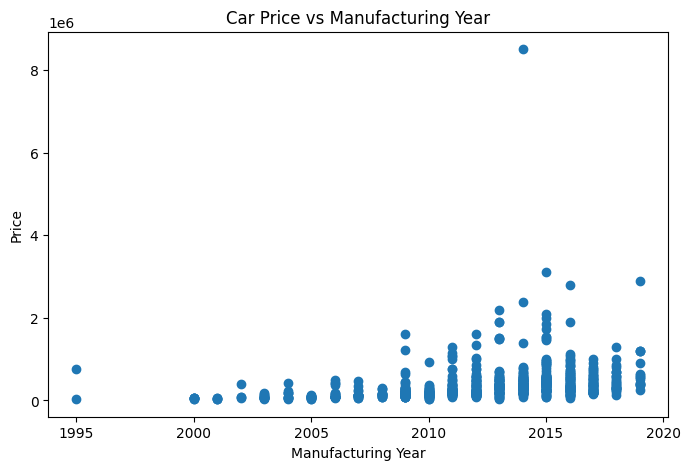

In [80]:
# Chart - 1 visualization code

plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['Price'])
plt.xlabel("Manufacturing Year")
plt.ylabel("Price")
plt.title("Car Price vs Manufacturing Year")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

A scatter plot is ideal for visualizing the relationship between two continuous variables—in this case, the car's manufacturing year and its price. It helps to quickly spot patterns, trends, and outliers, providing a straightforward way to see how much car age impacts selling price.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

* Newer cars generally command higher prices, showing a clear negative correlation between car age and price.

* A few older cars show unexpectedly high prices, possibly due to luxury/classic status or data anomalies.

* Price drops sharply for very old cars, confirming that depreciation is a key factor in the used car market.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

**Positive Business Impact**:

* These insights guide pricing strategies for sellers and dealers by highlighting that recent manufacturing years yield premium values.

* Buyers can use this information to negotiate better deals for older vehicles, knowing that price typically drops as age increases.

* Businesses can optimize inventory by focusing on newer models, which have better demand and higher margins.

**Potential Negative Growth Insight**:

* If older cars are consistently overpriced, they may remain unsold, tying up inventory and reducing business efficiency.

* Identifying overpriced old cars allows businesses to adjust pricing to boost sales velocity and reduce stagnation.

#### Chart - 2

In [15]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [16]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [17]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [18]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [19]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [20]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [21]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [22]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [23]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [24]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [25]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [26]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [27]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [28]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [32]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [33]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [34]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [35]:
# Expand Contraction

#### 2. Lower Casing

In [36]:
# Lower Casing

#### 3. Removing Punctuations

In [37]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [38]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [39]:
# Remove Stopwords

In [40]:
# Remove White spaces

#### 6. Rephrase Text

In [41]:
# Rephrase Text

#### 7. Tokenization

In [42]:
# Tokenization

#### 8. Text Normalization

In [43]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [44]:
# POS Taging

#### 10. Text Vectorization

In [45]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [46]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [47]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [48]:
# Transform Your data

### 6. Data Scaling

In [49]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [50]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [51]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [52]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [53]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [54]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [55]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [56]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [57]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [58]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [59]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [60]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [61]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [62]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***